## Data Pre-processing

In [1]:
# Importing the Libraries
import pandas as pd 
import seaborn as sns

In [2]:
# creating dataframes
tit_data_train = pd.read_csv(r"D:\Project-VH\tit_train.csv")
tit_data_test = pd.read_csv(r"D:\Project-VH\tit_test.csv")

In [3]:
# dataframe of all data from datasource
tit_data = pd.concat([tit_data_train, tit_data_test], axis = 0)
tit_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: xlabel='Survived', ylabel='count'>

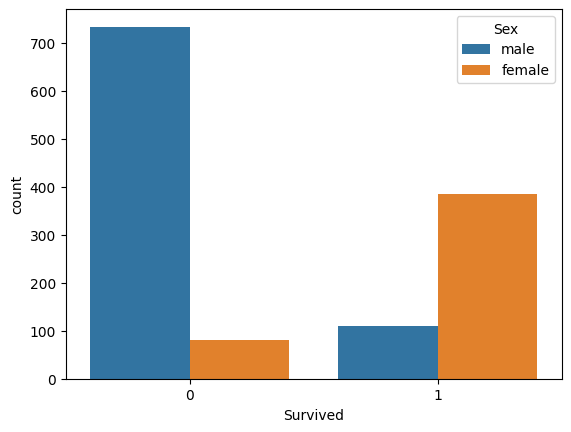

In [4]:
# our actual target variable
sns.countplot(x="Survived",data = tit_data, hue = "Sex")

In [5]:
# setting PassengerId as index
tit_data.set_index("PassengerId", inplace = True )

In [6]:
# Basic info 
tit_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: ylabel='PassengerId'>

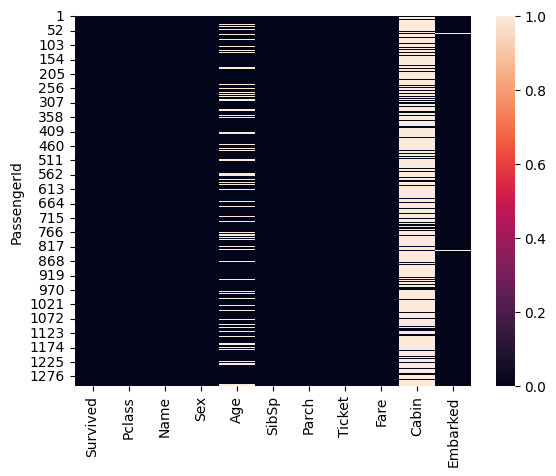

In [7]:
# Visualizing Missing Values
sns.heatmap(tit_data.isna())

In [8]:
tit_data.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [9]:
# deleting columns with missing values except Age 
del tit_data["Name"]
del tit_data["Cabin"]
del tit_data["Ticket"]
del tit_data["Embarked"]
del tit_data["Fare"]

C:\Users\vrhem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


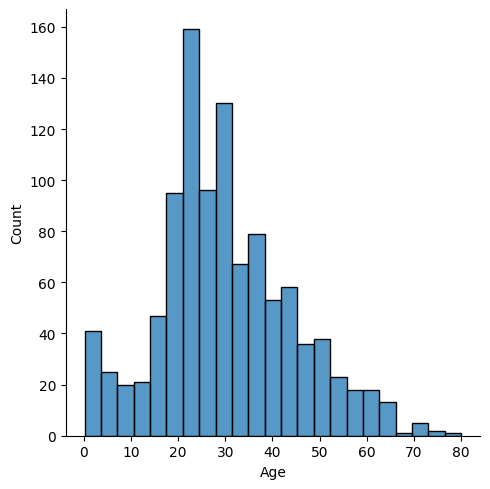

In [10]:
# Finding Average age of a passenger
sns.displot(tit_data,x = "Age")

In [11]:
# filling with mean age
tit_data["Age"] = tit_data["Age"].fillna(tit_data["Age"].mean())

In [12]:
tit_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

<Axes: ylabel='PassengerId'>

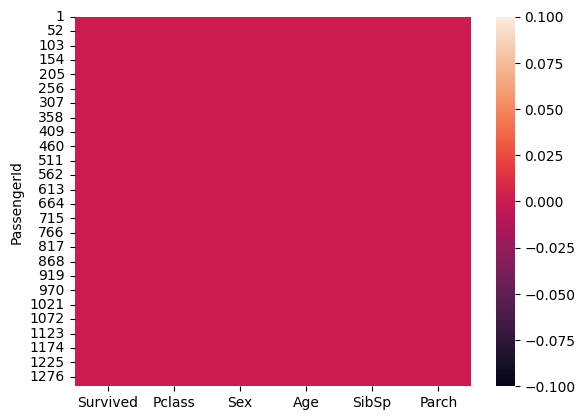

In [13]:
sns.heatmap(tit_data.isna())

#### No missing values


In [14]:
tit_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027
std,0.484918,0.837836,12.883193,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.881138,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


In [15]:
# Classing age into 10 intervals(bins)
tit_data["Age"] = pd.cut(tit_data["Age"], bins = 10)


In [16]:
tit_data

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,male,"(16.136, 24.119]",1,0
2,1,1,female,"(32.102, 40.085]",1,0
3,1,3,female,"(24.119, 32.102]",0,0
4,1,1,female,"(32.102, 40.085]",1,0
5,0,3,male,"(32.102, 40.085]",0,0
...,...,...,...,...,...,...
1305,0,3,male,"(24.119, 32.102]",0,0
1306,1,1,female,"(32.102, 40.085]",0,0
1307,0,3,male,"(32.102, 40.085]",0,0


In [17]:
# assigning booleans
tranform_columns = ["Sex","Pclass","Age","Parch","SibSp"]
final_data  = pd.get_dummies(tit_data, columns = tranform_columns , prefix= tranform_columns )

In [18]:
# 0 and 1 s
final_data = final_data.astype(int)

In [19]:
final_data

,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,"Age_(0.0902, 8.153]","Age_(8.153, 16.136]","Age_(16.136, 24.119]","Age_(24.119, 32.102]",...,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1306,1,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1307,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
final_data.columns

Index(['Survived', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Age_(0.0902, 8.153]', 'Age_(8.153, 16.136]',
       'Age_(16.136, 24.119]', 'Age_(24.119, 32.102]', 'Age_(32.102, 40.085]',
       'Age_(40.085, 48.068]', 'Age_(48.068, 56.051]', 'Age_(56.051, 64.034]',
       'Age_(64.034, 72.017]', 'Age_(72.017, 80.0]', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Parch_9',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8'],
      dtype='object')

In [21]:
final_data.to_csv(r"D:\Project-VH\titanic_data_Cleaned.csv")